# Combining pygwb_pipe jobs
### (Max Lalleman, Arianna Renzini)

## 1. Loading in packages and path to pygwb and the output files from all the jobs

If pygwb is not installed locally, the path to the package has to be provided below.

**NOTE: Running this notebook on the full 100 days takes ~30 minutes**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from os import listdir
from os.path import isfile, join
'''
module_path_2 = '/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb'
sys.path.insert(0,module_path_2)
'''

plt.rcParams["figure.figsize"] = (12,8)

We define here the path to the output files from all jobs. 

In [2]:
path = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/DAG/output/Tryout_100_day/"

We now load in the files found in the path folder, both psds and point_estimate files.

Currently this is not yet implemented for the pickled baseline files, but the procedure for reading in and using their data will be quite similar.

In [3]:
onlyfiles_psd = [f for f in listdir(path) if isfile(join(path, f)) if f.startswith("psds")]
onlyfiles_point_estimates = [f for f in listdir(path) if isfile(join(path, f)) if f.startswith("point")]

The reading of these files is not automatically sorted, so we have to sort our lists of data files using a certain sortingFunction which depends on the naming convention of those data files

In [4]:
def sortingFunction(item):
    return np.float64(item[10:].partition('.')[0])   

def sortingFunction_point(item):
    return np.float64(item[21:].partition('.')[0]) 

In [5]:
onlyfiles_psd.sort(key=sortingFunction)
data_files_psd = np.array(onlyfiles_psd)

onlyfiles_point_estimates.sort(key=sortingFunction_point)
data_files_point = np.array(onlyfiles_point_estimates)

Now we have datafiles of psds and point_estimates in chronological order.

We load in just the first file from this list to get the frequencies for later -- these are the same for all files in the dataset.

In [6]:
data_file_freq = data_files_point[0]
data_Freq = np.load("{0}".format(path)+data_file_freq)
frequencies = data_Freq['frequencies']

## 2. Reading in the output from pygwb_pipe: Y_f and sigma_f

Now we will load in the data from these data_files. I have tried to optimise this process, because it can take a very long time.

So far this is the fastest method I have found, using a pre-defined loading function and list comprehension.

In [7]:
def loading_function(path, file):
    data_file = np.load("{0}".format(path) + file)
    return data_file

In what follows, we restrict the analysis to the first 30 days of output data. You can find the full analysis in the commented sections of the notebook.

In [8]:
total_days = 100
days_to_load = 30
last_idx = int(len(data_files_point)*days_to_load/total_days)

print(f'We\'re going to load the first {last_idx} out of the {len(data_files_point)} files.')

We're going to load the first 360 out of the 1200 files.


In [9]:
Y_opt_from_each_job_short = [float(loading_function(path, file)["point_estimate"]) for file in data_files_point[0:last_idx]]
Y_opt_from_each_job_short = np.array(Y_opt_from_each_job_short)

In [10]:
sig_opt_from_each_job_short = [float(loading_function(path, file)["sigma"]) for file in data_files_point[0:last_idx]]
sig_opt_from_each_job_short = np.array(sig_opt_from_each_job_short)

In [11]:
Y_segment_from_each_job_short = [loading_function(path, file)["point_estimate_spectrogram"] for file in data_files_point[0:last_idx]]

In [12]:
sig_segment_from_each_job_short = [loading_function(path, file)["sigma_spectrogram"] for file in data_files_point[0:last_idx]]

The loading in (which is the longest part of this notebook) of this 'short' list should take around four minutes. 

And now the code which loads the full 100 days - **This is now commented out as it takes a long time**

In [13]:
'''
Y_opt_from_each_job = [float(loading_function(path, file)["point_estimate"]) for file in data_files_point]
Y_opt_from_each_job = np.array(Y_opt_from_each_job)

sig_opt_from_each_job = [float(loading_function(path, file)["sigma"]) for file in data_files_point]
sig_opt_from_each_job = np.array(sig_opt_from_each_job)

Y_segment_from_each_job = [loading_function(path, file)["point_estimate_spectrogram"] for file in data_files_point]

sig_segment_from_each_job = [loading_function(path, file)["sigma_spectrogram"] for file in data_files_point]
'''

'\nY_opt_from_each_job = [float(loading_function(path, file)["point_estimate"]) for file in data_files_point]\nY_opt_from_each_job = np.array(Y_opt_from_each_job)\n\nsig_opt_from_each_job = [float(loading_function(path, file)["sigma"]) for file in data_files_point]\nsig_opt_from_each_job = np.array(sig_opt_from_each_job)\n\nY_segment_from_each_job = [loading_function(path, file)["point_estimate_spectrogram"] for file in data_files_point]\n\nsig_segment_from_each_job = [loading_function(path, file)["sigma_spectrogram"] for file in data_files_point]\n'

We will continue our investigation by reading in the spectra of point estimate and sigma.

##### first 30 days for demonstration

In [14]:
Y_spectra_fast = np.zeros((len(data_files_point[0:last_idx]),len(frequencies)))
for index,file in enumerate(data_files_point[0:last_idx]):
    data_file = np.load("{0}".format(path+file))
    Y_spectra_fast[index,:] = data_file["point_estimate_spectrum"]

In [15]:
sigma_spectra_fast = np.zeros((len(data_files_point[0:last_idx]),len(frequencies)))
for index,file in enumerate(data_files_point[0:last_idx]):
    data_file = np.load("{0}".format(path+file))
    sigma_spectra_fast[index,:] = data_file["sigma_spectrum"]

##### Full run

In [16]:
'''
Y_spectra = np.zeros((len(data_files_point),len(frequencies)))
for index,file in enumerate(data_files_point):
    data_file = np.load("{0}".format(path+file))
    Y_spectra[index,:] = data_file["point_estimate_spectrum"]
'''

'\nY_spectra = np.zeros((len(data_files_point),len(frequencies)))\nfor index,file in enumerate(data_files_point):\n    data_file = np.load("{0}".format(path+file))\n    Y_spectra[index,:] = data_file["point_estimate_spectrum"]\n'

In [17]:
'''
sigma_spectra = np.zeros((len(data_files_point),len(frequencies)))
for index,file in enumerate(data_files_point):
    data_file = np.load("{0}".format(path+file))
    sigma_spectra[index,:] = data_file["sigma_spectrum"]
'''

'\nsigma_spectra = np.zeros((len(data_files_point),len(frequencies)))\nfor index,file in enumerate(data_files_point):\n    data_file = np.load("{0}".format(path+file))\n    sigma_spectra[index,:] = data_file["sigma_spectrum"]\n'

## 3. Combining the data: $Y(f)$ , $\sigma(f)$ , $Y$ , $\sigma$ , and SNR

We have to combine the data from each job to form the overall point estimate $Y$ and sigma $\sigma$, and also to form the final point estimate and sigma spectra.

We begin by loading in and combining the data from the spectrograms such that we can get the point estimate and sigma from each segment of the job files (*not per job, per segment*).

We perform that by using the *calc_Y_sigma_from_Yf_varf* function from `pygwb.util` that combines the spectra of Y and sigma for each segment into a single weighted value. To perform this calculation we need to define an $\alpha$ and $f_{\rm ref}$, and use the frequencies read in earlier. 

The list *Y_and_sig_per_segment* will have multiple elements (corresponding to each data segment) with each element having two entries: $Y$ and $\sigma$.


In [18]:
from pygwb.util import calc_Y_sigma_from_Yf_varf
fref = 25
alpha = 0

In [19]:
Y_and_sig_per_segment =  np.array([calc_Y_sigma_from_Yf_varf(row,sig_segment_from_each_job_short[index][second_index]**2,freqs=frequencies,alpha=alpha,fref=fref) 
                          for index,arr in enumerate(Y_segment_from_each_job_short) for second_index,row in enumerate(arr)])

In [20]:
Y_segment = Y_and_sig_per_segment.T[0]
sig_segment = Y_and_sig_per_segment.T[1]

We define here the means and standard deviations of *Y_segment* and *sig_segment*, which are used later for plotting purposes.

In [21]:
gem_segment = np.mean(Y_segment)
std_Y_segment = np.std(Y_segment)
gem_sig_segment = np.mean(sig_segment)
std_sig_segment = np.std(sig_segment)

We now combine the point estimates and sigmas of every job into one final point estimate and sigma. The jobs are treated as independent *segments* - therefore we can use the relative formulas for example shown in the O3 isotropic paper.

Specifically we use

$$
Y_{\rm final} =  \frac{\sum_{\rm jobs}\frac{Y_{\rm job}}{\sigma^2_{\rm job}}}{\sum_{{\rm jobs}} \frac{1}{\sigma_{\rm job}^2}}\, , \qquad \sigma_{\rm final} = \sqrt{\frac{1}{\sum_{{\rm jobs}} \frac{1}{\sigma_{\rm job}^2}}}
$$

However, we also want to make plots of $Y$ and $\sigma$ per day. <br>
Since the jobs were ran for 7200 seconds and a day is 12 times 7200 = 86400 seconds we take a sum over 12 elements for plotting later on.

The final values are called *Y_final* and *sigma_final*.

In [22]:
sig_opt_squared = [sigma**-2 for sigma in sig_opt_from_each_job_short]
inv_var_sum = np.sum(sig_opt_squared)

#Overall sigma
sigma_final = np.sqrt(1/inv_var_sum)

inv_var_sum_day = [np.sum(sig_opt_squared[i:i + 12]) for i in range(0, len(sig_opt_squared), 12)]
sig_opt_day = [np.sqrt(1/ele) for ele in inv_var_sum_day]

In [23]:
Y_opt_all = [Y_est * sigma**-2 for Y_est, sigma in zip(Y_opt_from_each_job_short, sig_opt_from_each_job_short)]
Y_est_100_day_first_step = [np.sum(Y_opt_all[i:i + 12]) for i in range(0, len(Y_opt_all), 12)]

Y_est_100_day_end = [ele/sigma for ele, sigma in zip(Y_est_100_day_first_step, inv_var_sum_day)]
#Overall point Estimate
Y_final = np.sum(Y_opt_all)/inv_var_sum

In [24]:
print("final values: {:.2e}".format(Y_final)+ " +\- {:.2e}".format(sigma_final))

final values: 1.07e-07 +\- 1.27e-09


Now we combine the spectra into one final spectrum. The final spectra are called *Y_f_final* and *sigma_f_final*. 

In [25]:
var_transposed = sigma_spectra_fast.T
Y_transposed = Y_spectra_fast.T

sig_opt_squared_f = [[1/sig**2 for sig in row] for row in var_transposed]

var_sum_f = np.sum(sig_opt_squared_f,axis=1)
sigma_f_final = np.sqrt(1/var_sum_f)

Y_opt_total_f = [[Y_est * sigma**-2 for Y_est,sigma in zip(row,row2)] for row, row2 in zip(Y_transposed,var_transposed)]
Y_f_final = np.sum(Y_opt_total_f,axis=1)/var_sum_f

Finally, we also compute the SNR:

In [26]:
SNR = np.zeros(len(Y_est_100_day_end))
for index, ele in enumerate(Y_est_100_day_end):
    #print(f"Y = {ele:e} \u00B1 {sig_opt_total_new[index]:e} \n")
    SNR_new = ele/sig_opt_day[index]
    SNR[index] = SNR_new
    #print(f"SNR is equal to {SNR_new:.6f}")

In [27]:
SNR_seg = np.zeros(len(Y_segment))
for index, ele in enumerate(Y_segment):
    #print(f"Y = {ele:e} \u00B1 {sig_opt_total_new[index]:e} \n")
    SNR_new = ele/sig_segment[index]
    SNR_seg[index] = SNR_new
    #print(f"SNR is equal to {SNR_new:.6f}")

Once again for plotting purposes, we store some means and standard deviations

In [28]:
gem_SNR = np.mean(SNR)
std_SNR = np.std(SNR)
gem_SNR_seg = np.mean(SNR_seg)
std_SNR_seg = np.std(SNR_seg)

In [29]:
gem_day = np.mean(Y_est_100_day_end)
std_day = np.std(Y_est_100_day_end)
gem_daily_sig = np.mean(sig_opt_day)
std_daily_sig = np.std(sig_opt_day)  

## 4. Plotting

We will start by plotting some of the results we have achieved in this notebook. <br>
First of all the SNR histograms. They might be a bit wacky, because we do not use a lot of data, but they might give a idea of how it should look like. 

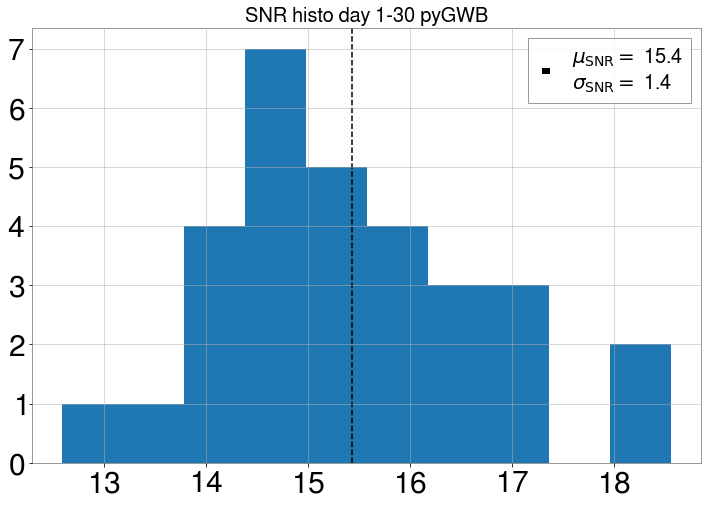

In [30]:
plt.hist(SNR, bins = 10)
plt.title('SNR histo day 1-30 pyGWB', fontsize = 20)
plt.axvline(gem_SNR, color= 'black', linestyle='--', label="$\\mu_{\mathrm{SNR}}=$ "+"{:.1f}".format(gem_SNR) + "\n$\\sigma_{\mathrm{SNR}}=$ "+"{:.1f}".format(std_SNR))
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(fontsize=20)
plt.show()

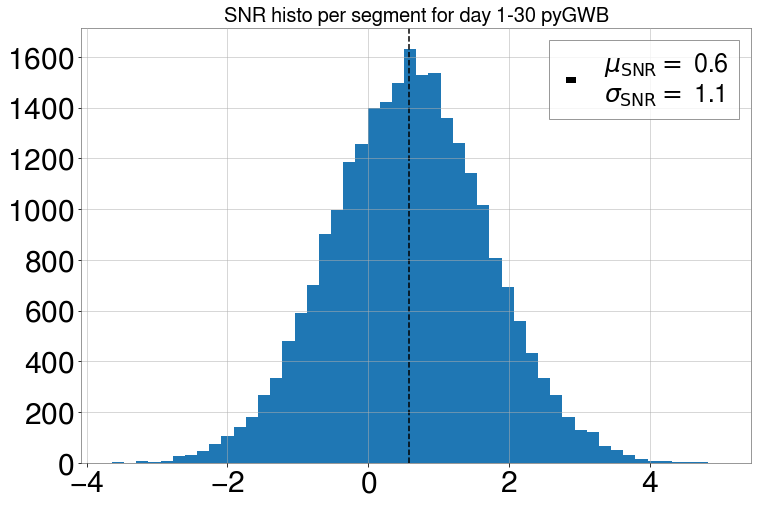

In [31]:
plt.hist(SNR_seg, bins = 50)
plt.title('SNR histo per segment for day 1-30 pyGWB', fontsize = 20)
plt.axvline(gem_SNR_seg, color= 'black', linestyle='--', label = "$\\mu_{\mathrm{SNR}}=$ "+"{:.1f}".format(gem_SNR_seg) + "\n$\\sigma_{\mathrm{SNR}}=$ "+"{:.1f}".format(std_SNR_seg))
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(fontsize=25)
plt.show()

We can do the same for the point estimate and sigmas

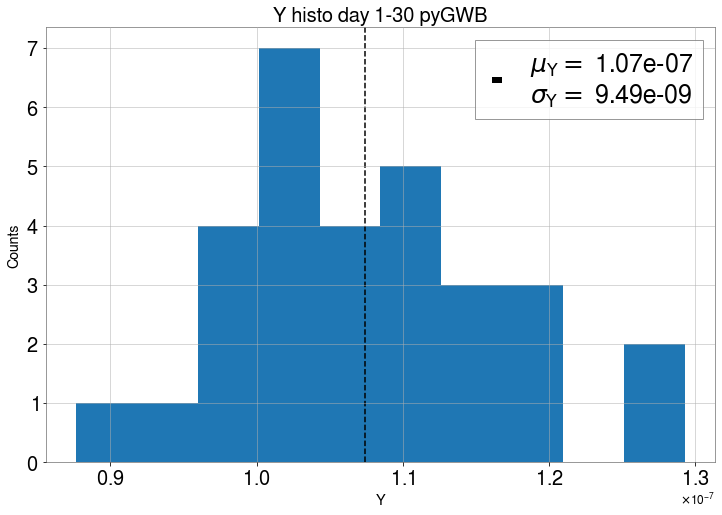

In [32]:
plt.hist(Y_est_100_day_end, bins = 10)
plt.title('Y histo day 1-30 pyGWB', fontsize = 20)
plt.axvline(gem_day, color= 'black', linestyle='--', label = "$\\mu_{\mathrm{Y}}=$ "+"{:.2e}".format(gem_day) + "\n$\\sigma_{\mathrm{Y}}=$ "+"{:.2e}".format(std_day))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Y')
plt.ylabel('Counts')
plt.legend(fontsize=25)
plt.show()

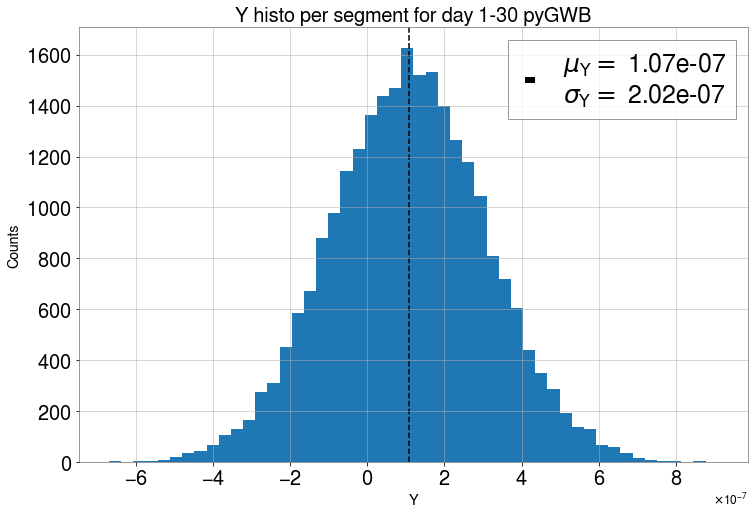

In [33]:
plt.hist(Y_segment, bins = 50)
plt.title('Y histo per segment for day 1-30 pyGWB', fontsize = 20)
plt.axvline(gem_segment, color= 'black', linestyle='--', label = "$\\mu_{\mathrm{Y}}=$ "+"{:.2e}".format(gem_segment) + "\n$\\sigma_{\mathrm{Y}}=$ "+"{:.2e}".format(std_Y_segment))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Y')
plt.ylabel('Counts')
plt.legend(fontsize=25)
plt.show()

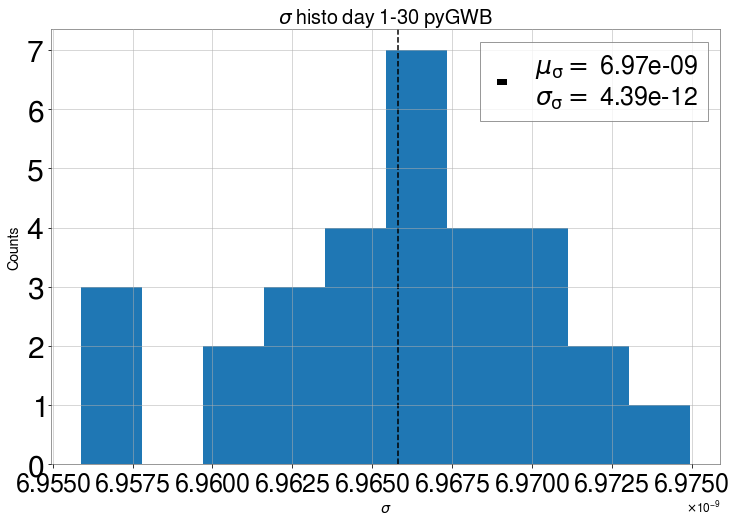

In [34]:
plt.hist(sig_opt_day, bins = 10)
plt.title('$\sigma$ histo day 1-30 pyGWB', fontsize = 20)
plt.axvline(gem_daily_sig, color= 'black', linestyle='--', label = "$\\mu_{\mathrm{\\sigma}}=$ "+"{:.2e}".format(gem_daily_sig) + "\n$\\sigma_{\mathrm{\\sigma}}=$ "+"{:.2e}".format(std_daily_sig))
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('$\sigma$')
plt.ylabel('Counts')
plt.legend(fontsize=25)
plt.show()

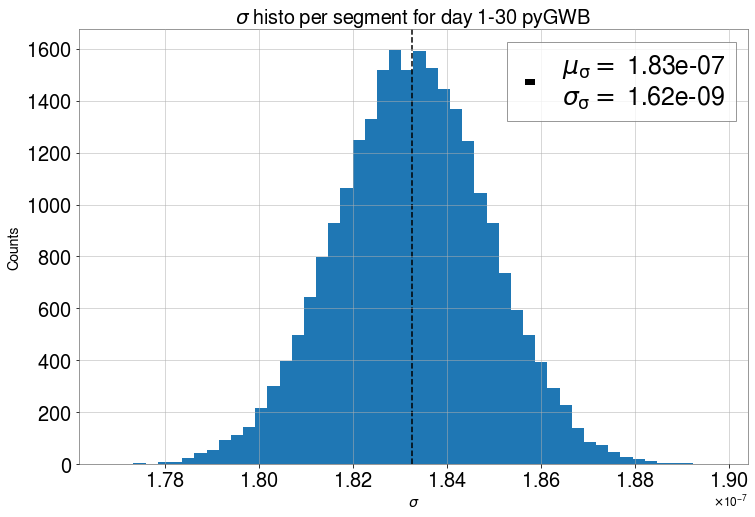

In [35]:
plt.hist(sig_segment, bins = 50)
plt.xticks(size = 20)
plt.title('$\sigma$ histo per segment for day 1-30 pyGWB', fontsize = 20)
plt.axvline(gem_sig_segment, color= 'black', linestyle='--', label = "$\\mu_{\mathrm{\\sigma}}=$ "+"{:.2e}".format(gem_sig_segment) + "\n$\\sigma_{\mathrm{\\sigma}}=$ "+"{:.2e}".format(std_sig_segment))
plt.yticks(size = 20)
plt.xlabel('$\sigma$')
plt.ylabel('Counts')
plt.legend(fontsize=25)
plt.show()

We can also make the cumulative plot for the point estimate and sigma.

In [36]:
sig_opt_day = np.array(sig_opt_day)

In [37]:
Y_cum_num = np.cumsum(Y_est_100_day_end/(sig_opt_day**2))
Y_cum_den = np.cumsum(1/(sig_opt_day**2))
  
Y_cum = Y_cum_num/Y_cum_den
sigma_cum = 1./np.sqrt(np.cumsum(1/(sig_opt_day**2)))
SNR_cum = Y_cum/sigma_cum

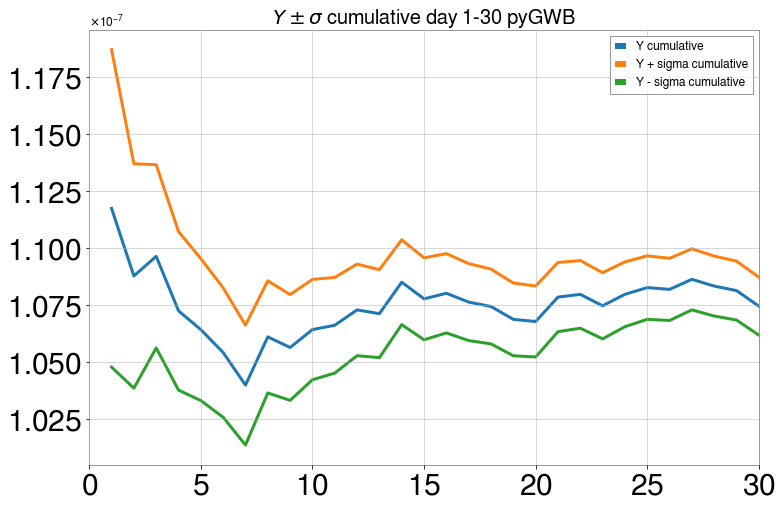

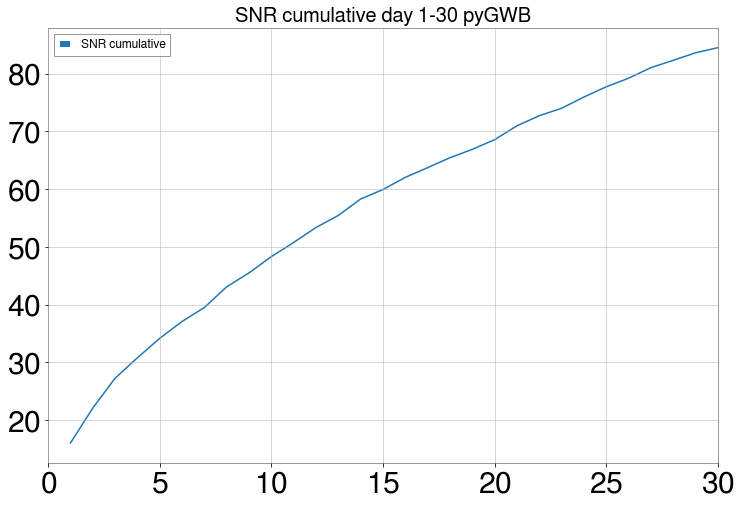

In [38]:
#print("Y = ", Y_cum[-1], "+/-", sigma_cum[-1], "\nSNR = ", SNR_cum[-1])
days = range(1,days_to_load+1)
plt.plot(days, Y_cum, label = "Y cumulative", linewidth = 3)
plt.plot(days, Y_cum + sigma_cum, label = "Y + sigma cumulative", linewidth = 3)
plt.plot(days, Y_cum - sigma_cum, label = "Y - sigma cumulative", linewidth = 3)
plt.xlim(0, days[-1])
plt.title(r"$Y \pm \sigma$ cumulative day {}-{} pyGWB".format(days[0], days[-1]), fontsize = 20)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend()
plt.show()

plt.plot(days, SNR_cum, label = "SNR cumulative")
plt.xlim(0, days[-1])
plt.title("SNR cumulative day {}-{} pyGWB".format(days[0], days[-1]), fontsize = 20)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend()
plt.show()

And also plot the final spectrum

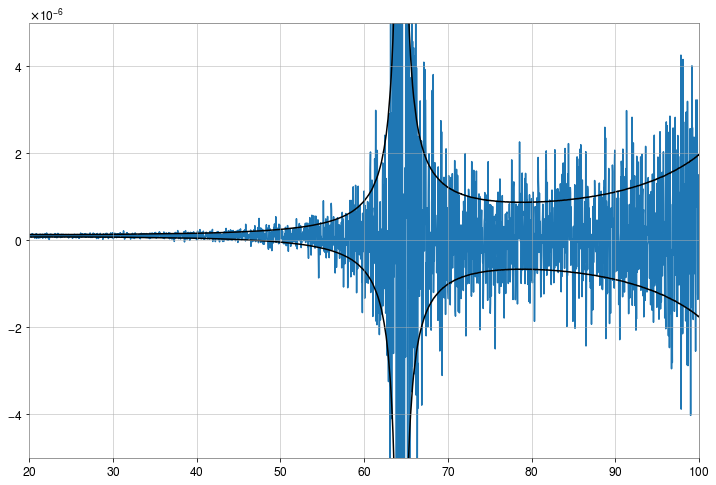

In [39]:
injected_Y = 1.06e-7
plt.plot(frequencies, Y_f_final)
plt.plot(frequencies, sigma_f_final + injected_Y, 'k')
plt.plot(frequencies, - sigma_f_final + injected_Y, 'k')
#plt.plot(frequencies, sig_opt_total_new_f,'k')
#plt.plot(frequencies, - sig_opt_total_new_f,'k')
plt.xlim(20, 100)
plt.ylim(-5e-6,5e-6)
plt.show()